# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [43]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [44]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

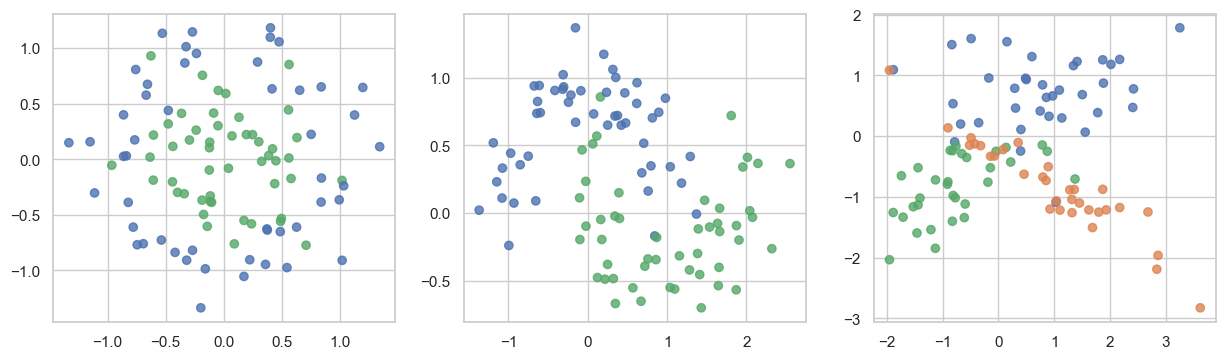

In [45]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [46]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

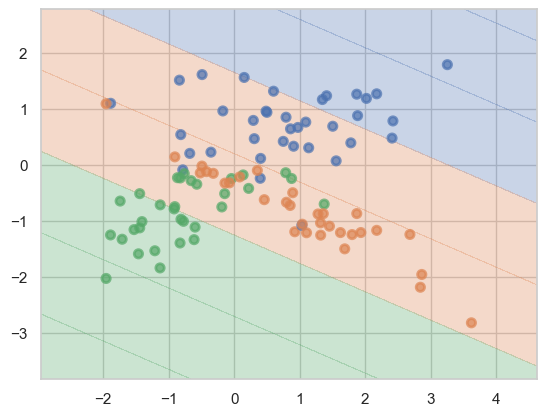

In [47]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

№ 1: Train = 1.000, Test 0.733
№ 2: Train = 1.000, Test 0.867
№ 3: Train = 1.000, Test 0.833


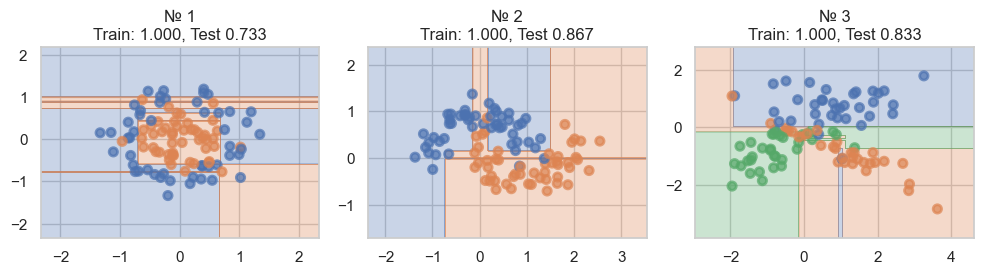

In [48]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(10, 5))

for i, (X, y) in enumerate(datasets):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42).fit(X_tr, y_tr)
    
    train_acc, test_acc = accuracy_score(y_tr, clf.predict(X_tr)), accuracy_score(y_te, clf.predict(X_te))
    
    plt.subplot(2, 3, i + 1)
    plot_surface(clf, X, y)
    plt.title(f'№ {i+1}\nTrain: {train_acc:.3f}, Test {test_acc:.3f}')
    print(f'№ {i+1}: Train = {train_acc:.3f}, Test {test_acc:.3f}')

plt.tight_layout()
plt.show()

__Ответ:__ Деревья сильно переобучились

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


=== Dataset 1 ===


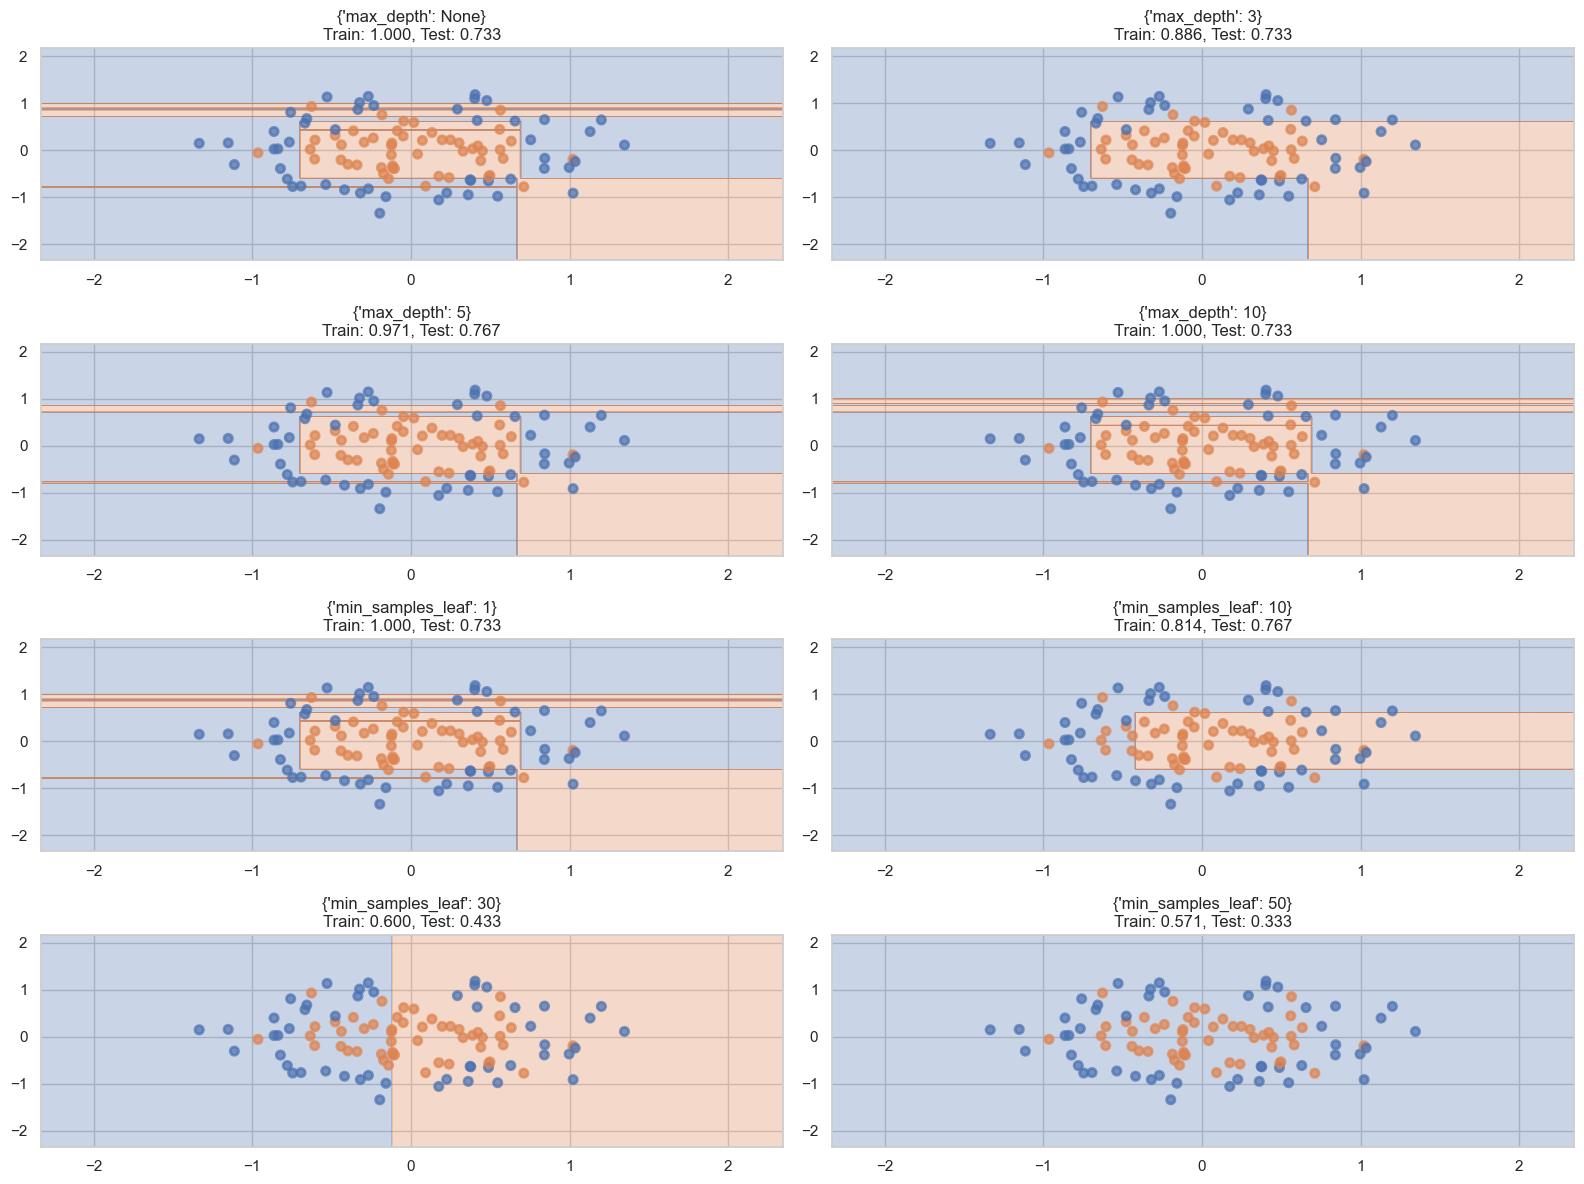


=== Dataset 2 ===


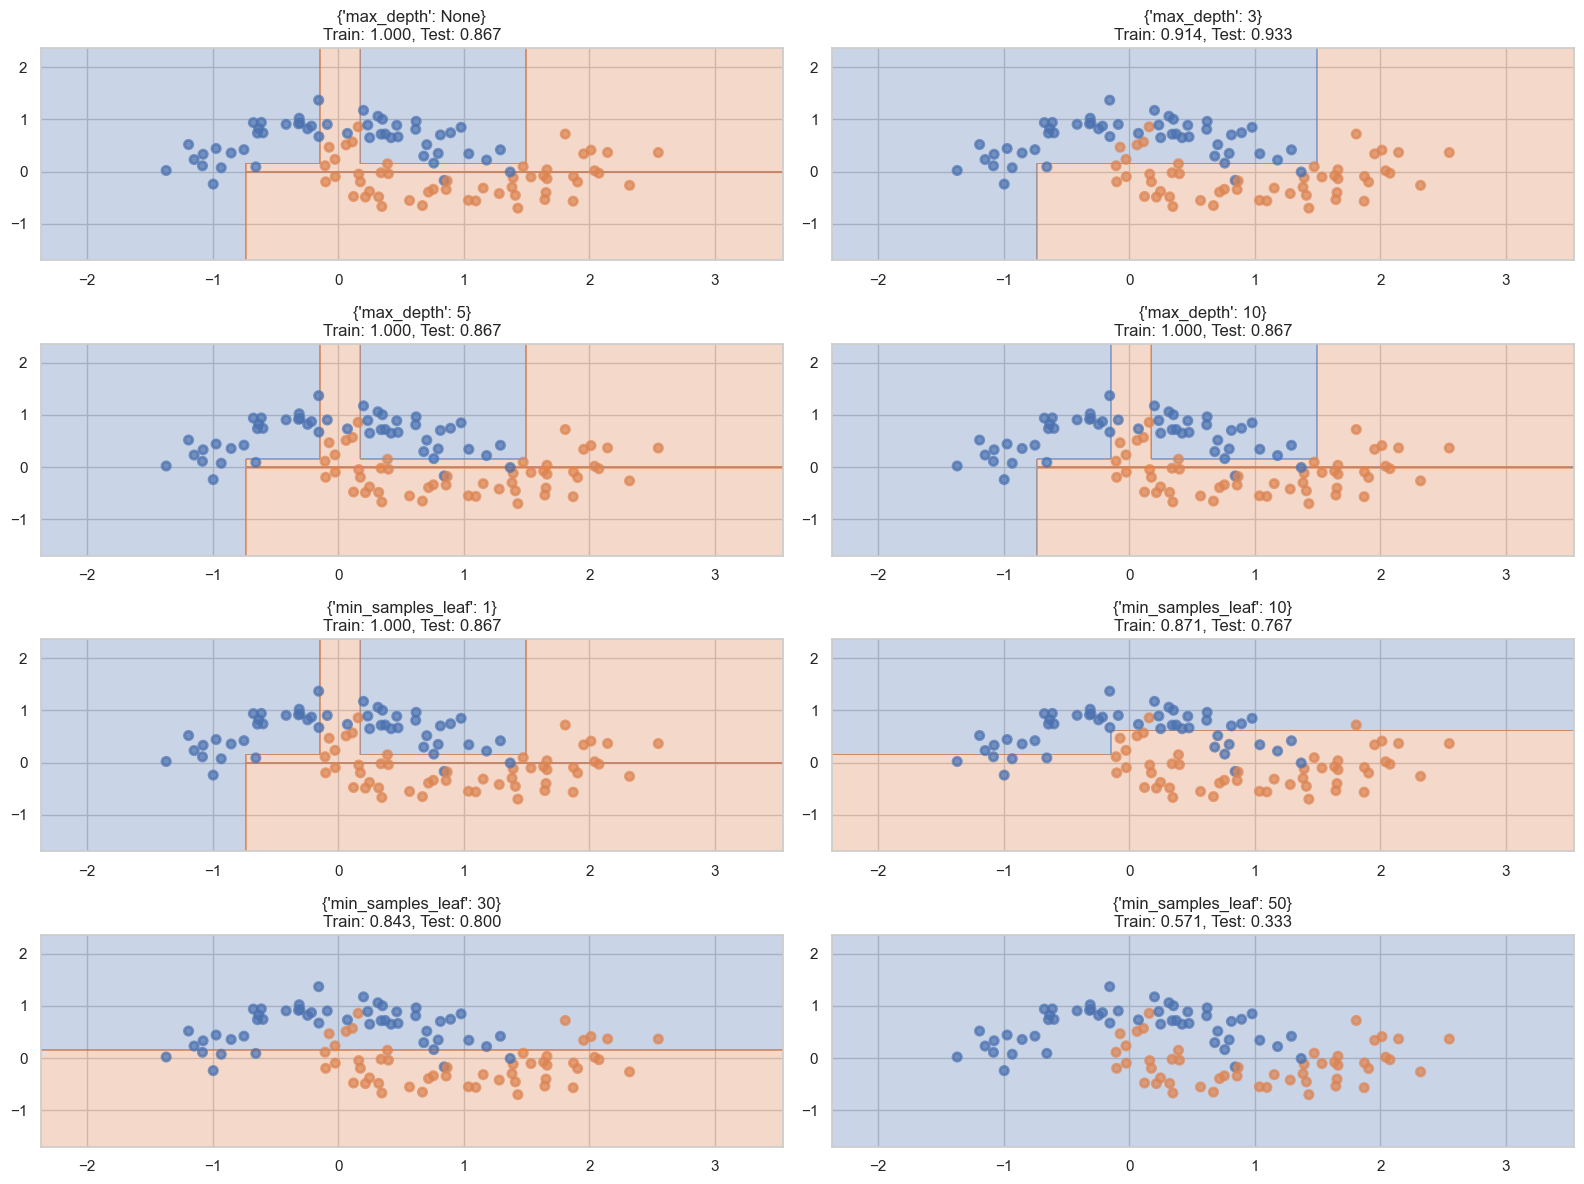


=== Dataset 3 ===


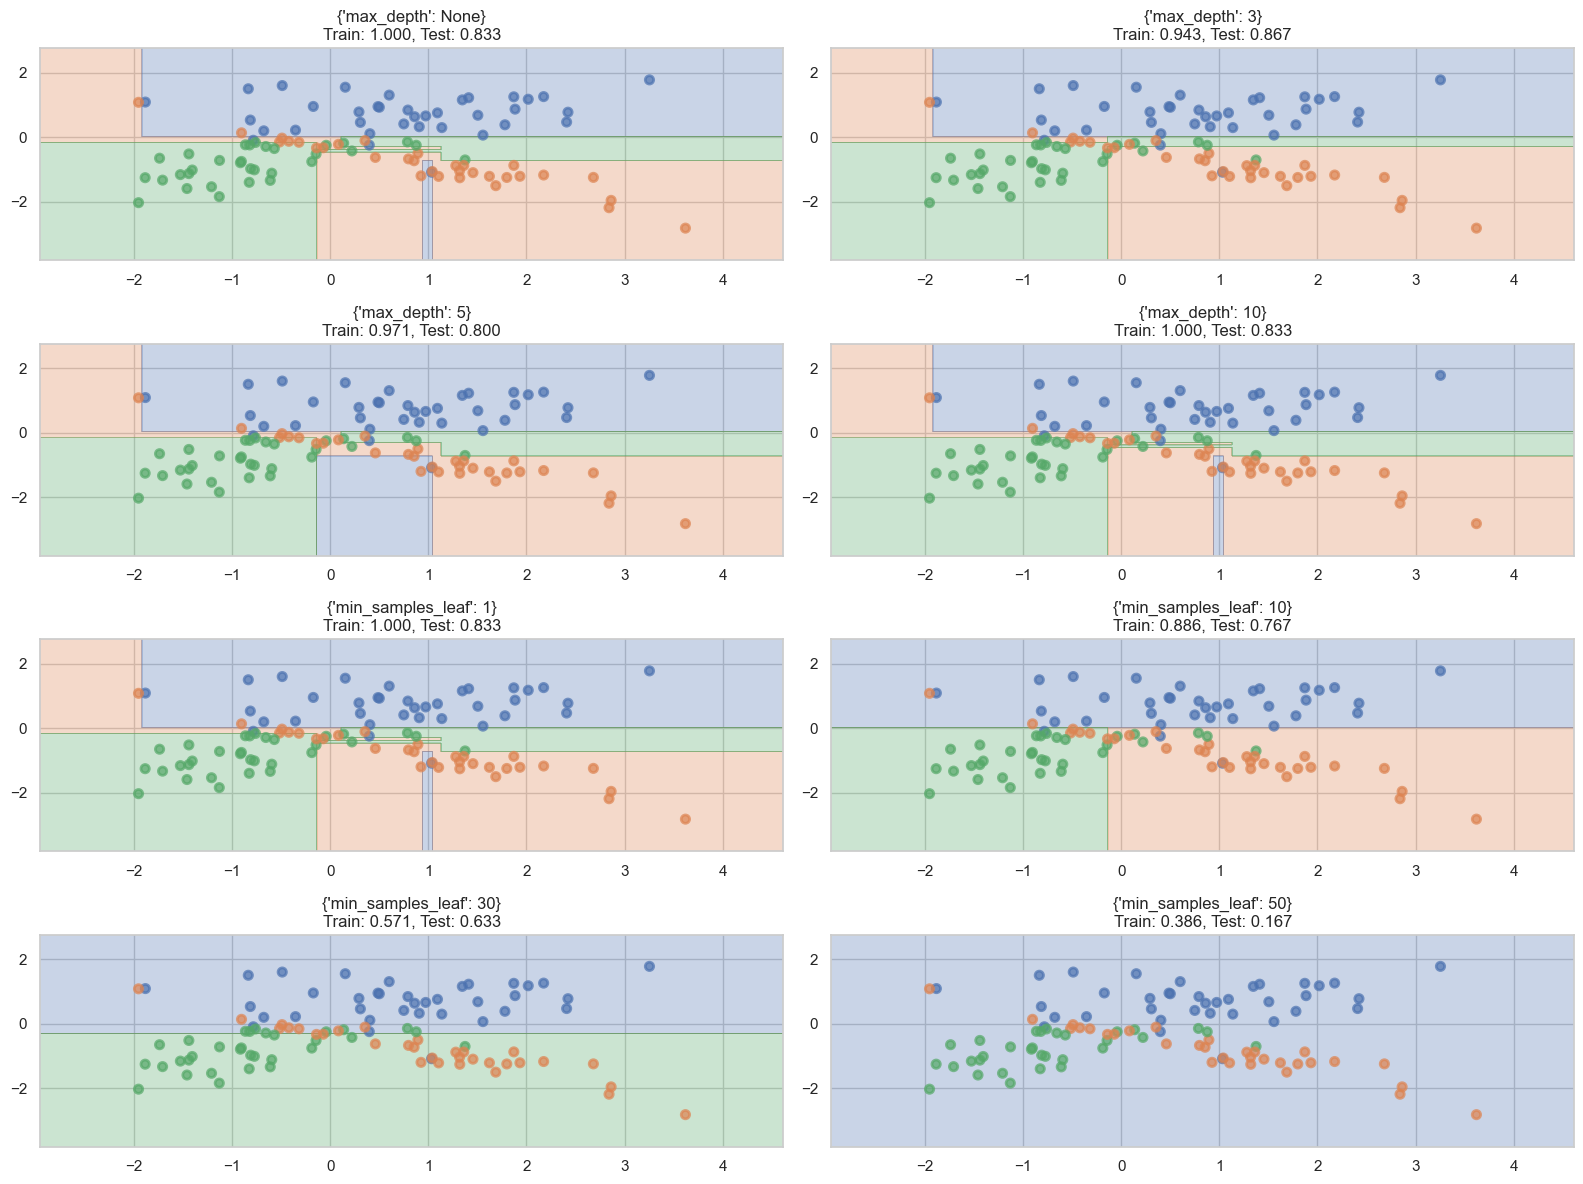

In [56]:
params_list = [
    {'max_depth': None},
    {'max_depth': 3},
    {'max_depth': 5},
    {'max_depth': 10},
    {'min_samples_leaf': 1},
    {'min_samples_leaf': 10},
    {'min_samples_leaf': 30},
    {'min_samples_leaf': 50}
]

for dataset_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print(f"\n=== Dataset {dataset_idx + 1} ===")
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for param_idx, params in enumerate(params_list):
        clf = DecisionTreeClassifier(random_state=42, **params)
        clf.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        
        plt.sca(axes[param_idx])
        plot_surface(clf, X, y)
        axes[param_idx].set_title(f'{params}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}')
    
    plt.tight_layout()
    plt.show()


__Ответ:__ С увеличением макситмальной глубины разделяющая поверхность усложняется, и переобучение растет. С увеличением минимального числа элементов в листах переобучение снижается. эффект похож на всех датасетах, ярче всего видно на circles и moons


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

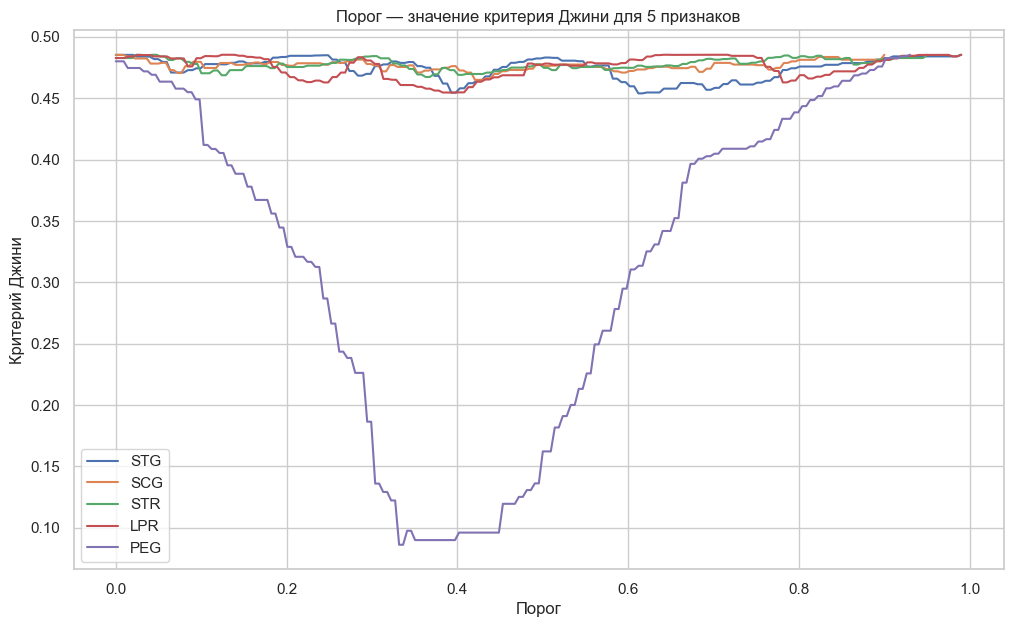

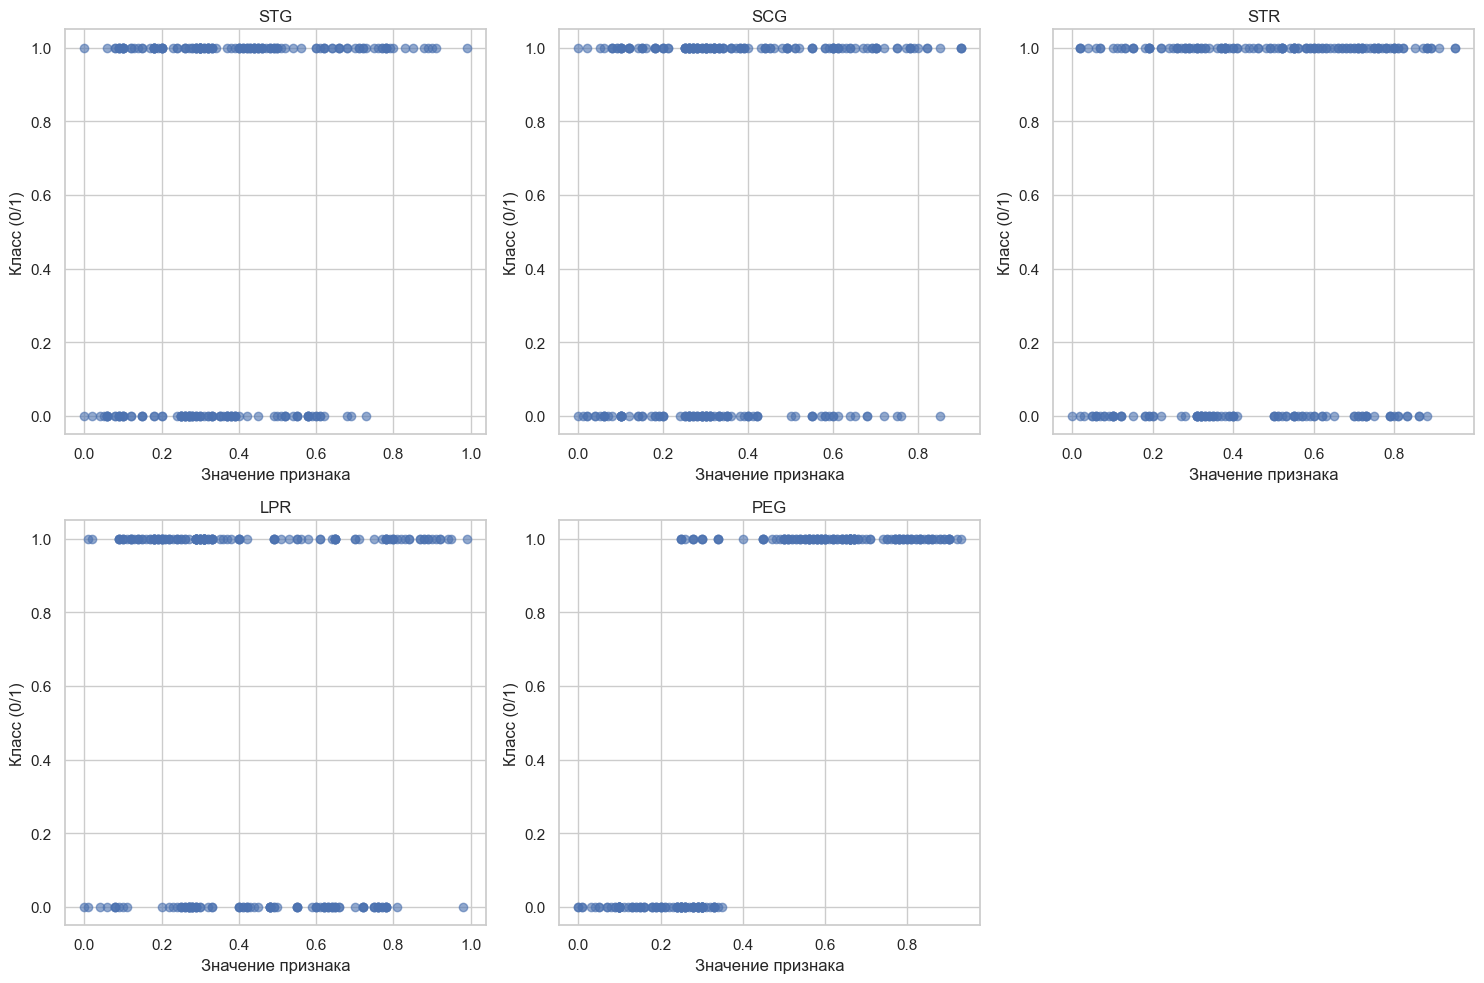

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv("./datasets/students.csv")

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

feature_names = X.columns

def gini_split(feature, y, threshold):
    left_idx = feature <= threshold
    right_idx = ~left_idx

    def gini(group):
        if len(group) == 0:
            return 0
        p = group.mean()
        return 1 - p**2 - (1-p)**2

    g_left = gini(y[left_idx])
    g_right = gini(y[right_idx])

    w_left = len(y[left_idx]) / len(y)
    w_right = 1 - w_left

    return w_left * g_left + w_right * g_right

plt.figure(figsize=(12, 7))

for i, col in enumerate(feature_names):
    feature = X[col]
    thresholds = np.linspace(feature.min(), feature.max(), 200)
    ginis = [gini_split(feature, y, t) for t in thresholds]

    plt.plot(thresholds, ginis, label=col)

plt.title("Порог — значение критерия Джини")
plt.xlabel("Порог")
plt.ylabel("Критерий Джини")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))

for i, col in enumerate(feature_names, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X[col], y, alpha=0.6)
    plt.title(col)
    plt.xlabel("Значение признака")
    plt.ylabel("Класс (0/1)")
    plt.grid(True)

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?


**Ответ:**  Лучше всего выборку разделяет признак PEG - у него кривая Джини даёт сильный провал почти до нуля. Это хорошо согласуется со scatter-графиком: по PEG классы визуально почти разделены, в отличие от остальных признаков, где точки сильно перемешаны.

Для «хорошего» признака кривая Джини обычно имеет резкий глубокий минимум - значит, есть порог, который почти идеально делит классы. У «плохих» признаков кривая почти плоская и держится около одного уровня, потому что никакой порог не даёт заметного улучшения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [66]:
from sklearn.preprocessing import LabelEncoder

mushroom_data = pd.read_csv('./datasets/agaricus-lepiota.data', header=None)

feature_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 
    'ring-number', 'ring-type', 'spore-print-color', 
    'population', 'habitat'
]
mushroom_data.columns = feature_names

encoders_dict = {}
encoded_data = mushroom_data.copy()

for feature in encoded_data.columns:
    encoder = LabelEncoder()
    encoded_data[feature] = encoder.fit_transform(encoded_data[feature])
    encoders_dict[feature] = encoder

features = encoded_data.drop('class', axis=1).values
target = encoded_data['class'].values

random_seed = 69
np.random.seed(random_seed)
shuffled_indices = np.random.permutation(len(features))
split_index = len(features) // 2

X_train = features[shuffled_indices[:split_index]]
y_train = target[shuffled_indices[:split_index]]
X_test = features[shuffled_indices[split_index:]]
y_test = target[shuffled_indices[split_index:]]

feature_categories = ['categorical'] * features.shape[1]

from hw2code import DecisionTree

model = DecisionTree(
    feature_types=feature_categories,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1
)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)

def calculate_tree_depth(node, depth=0):
    if node["type"] == "terminal":
        return depth
    left_branch_depth = calculate_tree_depth(node["left_child"], depth + 1)
    right_branch_depth = calculate_tree_depth(node["right_child"], depth + 1)
    return max(left_branch_depth, right_branch_depth)

final_depth = calculate_tree_depth(model._tree)

print(f"Точность модели на тестовой выборке: {model_accuracy:.4f}")
print(f"Глубина дерева {final_depth}")

Точность модели на тестовой выборке: 1.0000
Глубина дерева 8


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).


------------------

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder

def get_datasets():
    datasets = {}
    
    import os
    import urllib.request
    os.makedirs('datasets', exist_ok=True)
    mushroom_path = 'datasets/mushrooms.csv'
    if not os.path.exists(mushroom_path):
        urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", mushroom_path)
    
    # Загрузка mushrooms
    mushroom_df = pd.read_csv(mushroom_path, header=None)
    encoded_mushroom = mushroom_df.copy()
    for column in mushroom_df.columns:
        encoder = LabelEncoder()
        encoded_mushroom[column] = encoder.fit_transform(mushroom_df[column])
    X_mushroom = encoded_mushroom.iloc[:, 1:].values  # признаки — столбцы 1 и далее
    y_mushroom = encoded_mushroom.iloc[:, 0].values   # целевая — первый столбец
    datasets['mushrooms'] = (X_mushroom, y_mushroom)
    
    # Загрузка tic-tac-toe (без изменений)
    ttt_df = pd.read_csv('datasets/tic-tac-toe-endgame.csv', header=None)
    encoded_ttt = ttt_df.copy()
    for column in ttt_df.columns:
        encoder = LabelEncoder()
        encoded_ttt[column] = encoder.fit_transform(ttt_df[column])
    X_ttt = encoded_ttt.iloc[:, :-1].values
    y_ttt = encoded_ttt.iloc[:, -1].values
    datasets['tic-tac-toe'] = (X_ttt, y_ttt)
    
    return datasets

datasets_info = get_datasets()

output_data = []

for name, (features, target) in datasets_info.items():
    print(f'\nТекущий датасет: {name}')
    
    result_line = {'Dataset': name}
    
    try:
        real_features = ['real'] * features.shape[1]
        dt_real = DecisionTree(real_features)
        accuracy_scores = cross_val_score(dt_real, features, target, cv=5, scoring=make_scorer(accuracy_score))
        result_line['DT_real'] = accuracy_scores.mean()
    except:
        result_line['DT_real'] = 0.0

    try:
        cat_features = ['categorical'] * features.shape[1]
        dt_cat = DecisionTree(cat_features)
        accuracy_scores = cross_val_score(dt_cat, features, target, cv=5, scoring=make_scorer(accuracy_score))
        result_line['DT_categorical'] = accuracy_scores.mean()
    except:
        result_line['DT_categorical'] = 0.0
    
    try:
        encoder = OneHotEncoder(sparse=False, drop='first')
        encoded_features = encoder.fit_transform(features)
        ohe_features = ['real'] * encoded_features.shape[1]
        dt_ohe = DecisionTree(ohe_features)
        accuracy_scores = cross_val_score(dt_ohe, encoded_features, target, cv=5, scoring=make_scorer(accuracy_score))
        result_line['DT_onehot'] = accuracy_scores.mean()
    except:
        result_line['DT_onehot'] = 0.0
    
    try:
        sk_tree = DecisionTreeClassifier(random_state=42)
        accuracy_scores = cross_val_score(sk_tree, features, target, cv=5, scoring=make_scorer(accuracy_score))
        result_line['sklearn_DT'] = accuracy_scores.mean()
    except:
        result_line['sklearn_DT'] = 0.0
    
    output_data.append(result_line)

results_table = pd.DataFrame(output_data)

print(results_table.round(4))


Текущий датасет: mushrooms

Текущий датасет: tic-tac-toe
       Dataset  DT_real  DT_categorical  DT_onehot  sklearn_DT
0    mushrooms   0.9739          0.9593        0.0      0.9616
1  tic-tac-toe   0.3834          0.4014        0.0      0.6874


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Как выяснилось, нет универсального лучшего алгоритма — их ранжирование меняется от датасета к датасету. Судя по всему, DecisionTree от sklearn часто лидирует благодаря своей оптимизации.

Для работы с категориальными признаками (как в "mushrooms") лучше задействовать встроенную обработку категорий, так как one-hot encoding только вредит, раздувая пространство признаков и делая данные разреженными.

Стоит учесть, что на результаты влияет случайность при кросс-валидации. Чтобы улучшить воспроизводимость и стабильность, можно задать фиксированный random_state и опробовать продвинутую регуляризацию.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

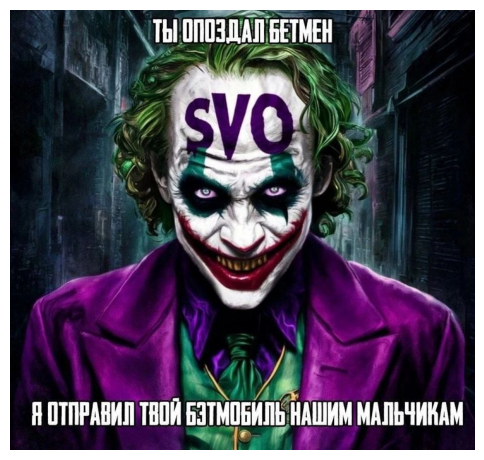

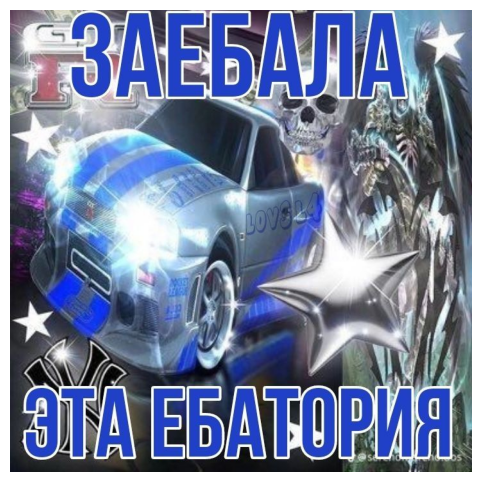

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(6, 6))
img1 = mpimg.imread('secret/1.jpg')
plt.imshow(img1)
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
img2 = mpimg.imread('secret/2.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()